In [32]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import seaborn
from pandas_datareader import data

tickers = ['SPY','AAPL','ADBE','LUV','MSFT', 'SKYW','QCOM', 'HPQ','JNPR','AMD','IBM']


In [33]:
def load_financial_data(symbols, start_date, end_date, output_file):
    try:
        df = pd.read_pickle(output_file)
    except FileNotFoundError:
        df = data.DataReader(symbols, 'yahoo', start_date, end_date)
        df.to_pickle(output_file)
    return df

def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:
                pairs.append((keys[i], keys[j]))

    return pvalue_matrix, pairs

In [34]:
data = load_financial_data(tickers, '2001-01-01', '2018-01-01', 'multi_data_large.pkl')

In [35]:
pvalues, pairs = find_cointegrated_pairs(data['Adj Close'])
# print(pairs)

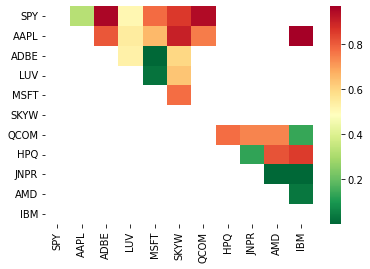

In [37]:
seaborn.heatmap(pvalues, xticklabels=tickers,
                yticklabels=tickers, cmap='RdYlGn_r',
                mask=(pvalues >= 0.98))
plt.show()
# print(pairs)
# print(data.head(3))